In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic_df = pd.read_csv(r'C:\Users\KRITHIGA\Downloads\Titanic-test.csv')

# Display the first few rows of the dataset
print(titanic_df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
# Check for missing values
print(titanic_df.isnull().sum())

# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna('S', inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.dropna(subset=['Fare'], inplace=True)

# Check for duplicates
duplicates = titanic_df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Remove duplicates
titanic_df.drop_duplicates(inplace=True)



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicate rows: 0


In [16]:
# Convert 'Survived', 'Pclass' to categorical data type
titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

# Summary statistics for numerical columns
print(titanic_df.describe())

# Summary statistics for categorical columns
print(titanic_df.describe(include='category'))



       PassengerId         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000   29.361582    0.523008    0.381594   32.204208
std     257.353842   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000   22.000000    0.000000    0.000000    7.910400
50%     446.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000   35.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200
        Survived  Pclass
count        891     891
unique         2       3
top            0       3
freq         549     491


In [17]:
#UNIVARIATE ANALYSIS

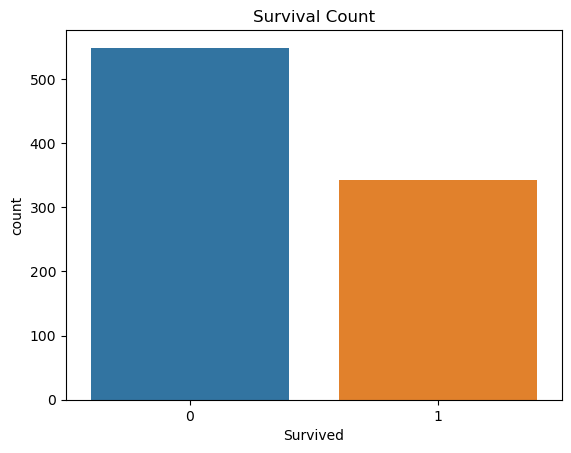

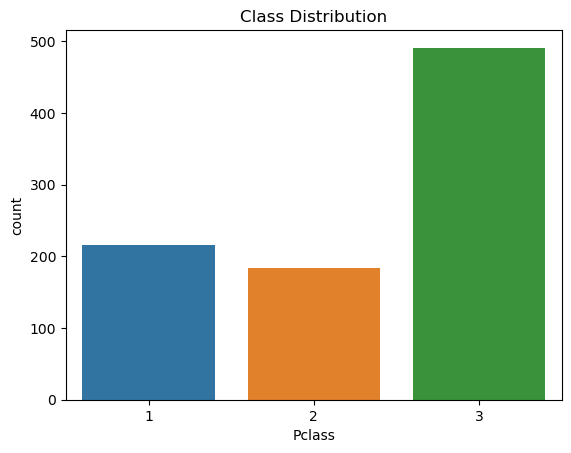

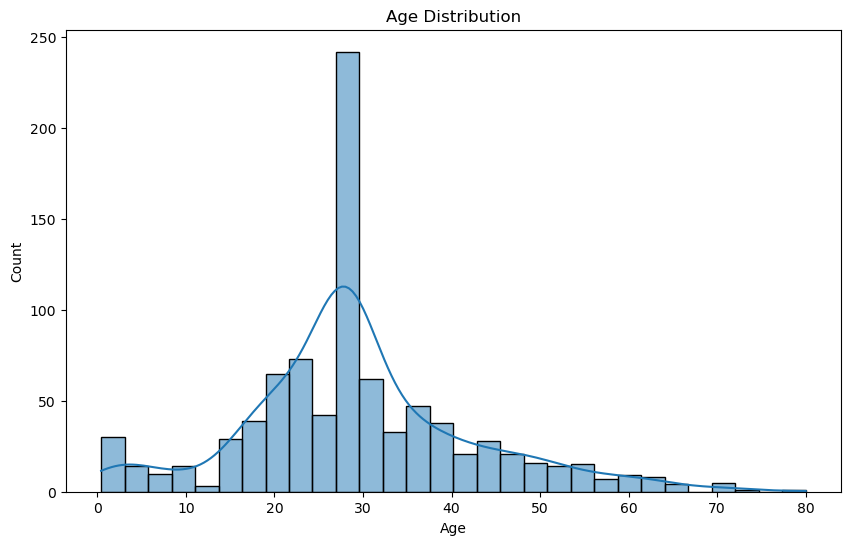

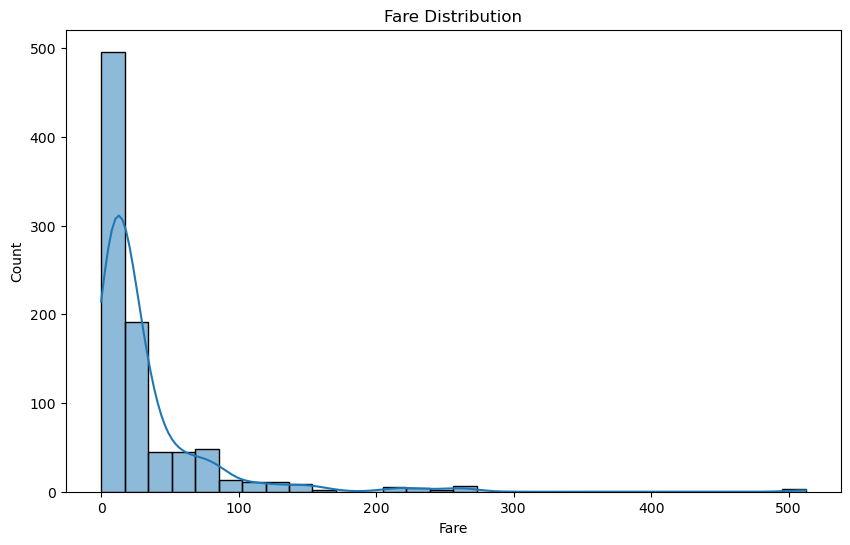

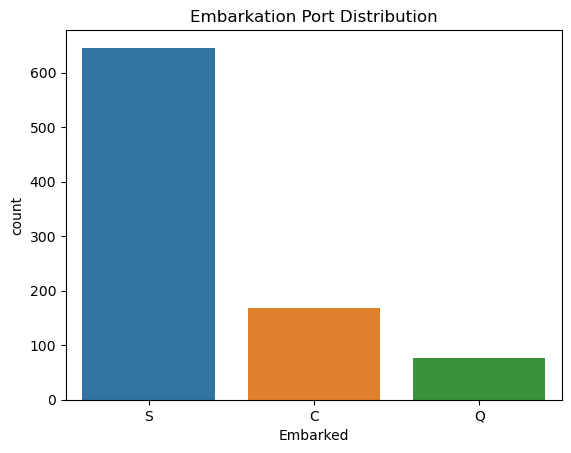

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival count
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

# Plot class distribution
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Class Distribution')
plt.show()

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

# Plot embarkation port distribution
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarkation Port Distribution')
plt.show()


In [19]:
#BIVARIATE ANALYSIS

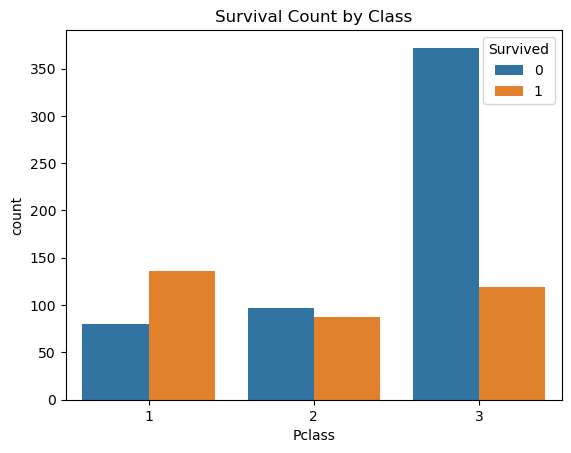

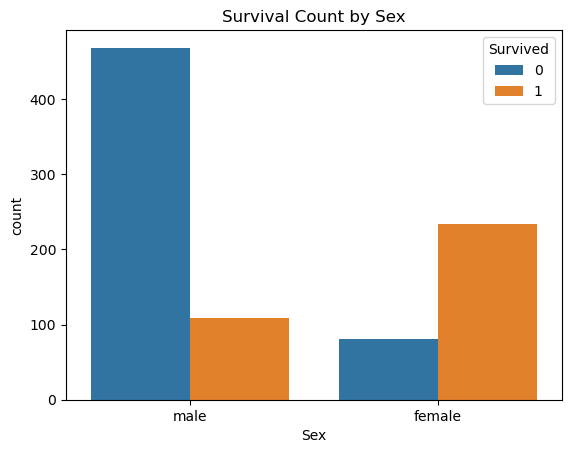

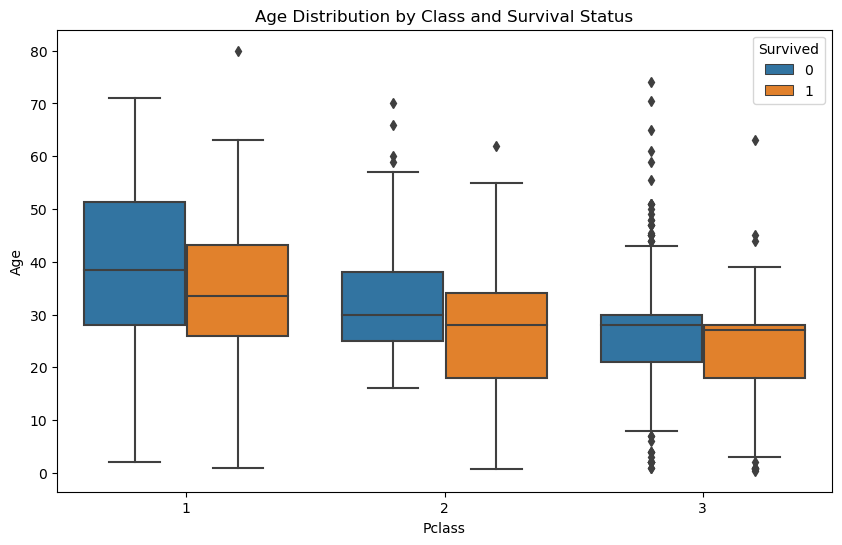

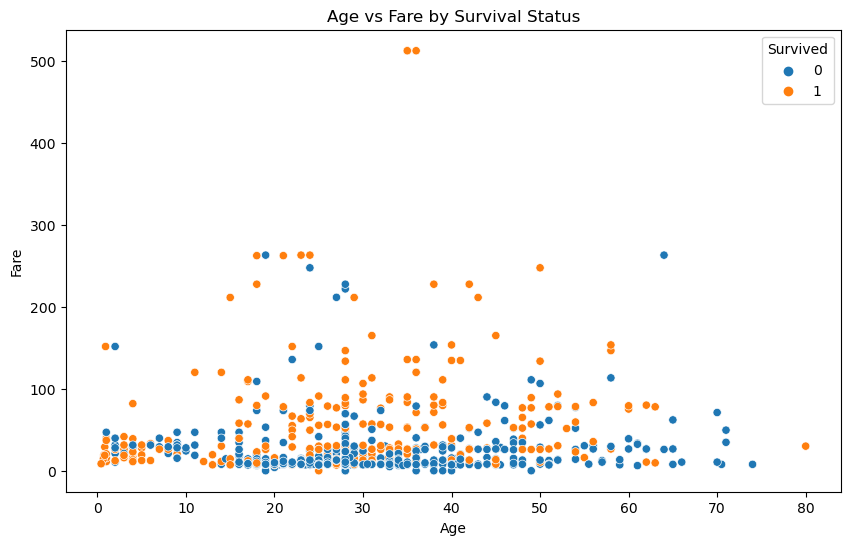

In [20]:
# Plot survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Count by Class')
plt.show()

# Plot survival rate by sex
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Sex')
plt.show()

# Boxplot of age by class and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_df)
plt.title('Age Distribution by Class and Survival Status')
plt.show()

# Scatter plot of age vs fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Age vs Fare by Survival Status')
plt.show()


In [21]:
#MULTIVARIATE ANALYSIS

C:\Users\KRITHIGA\anaconda3\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


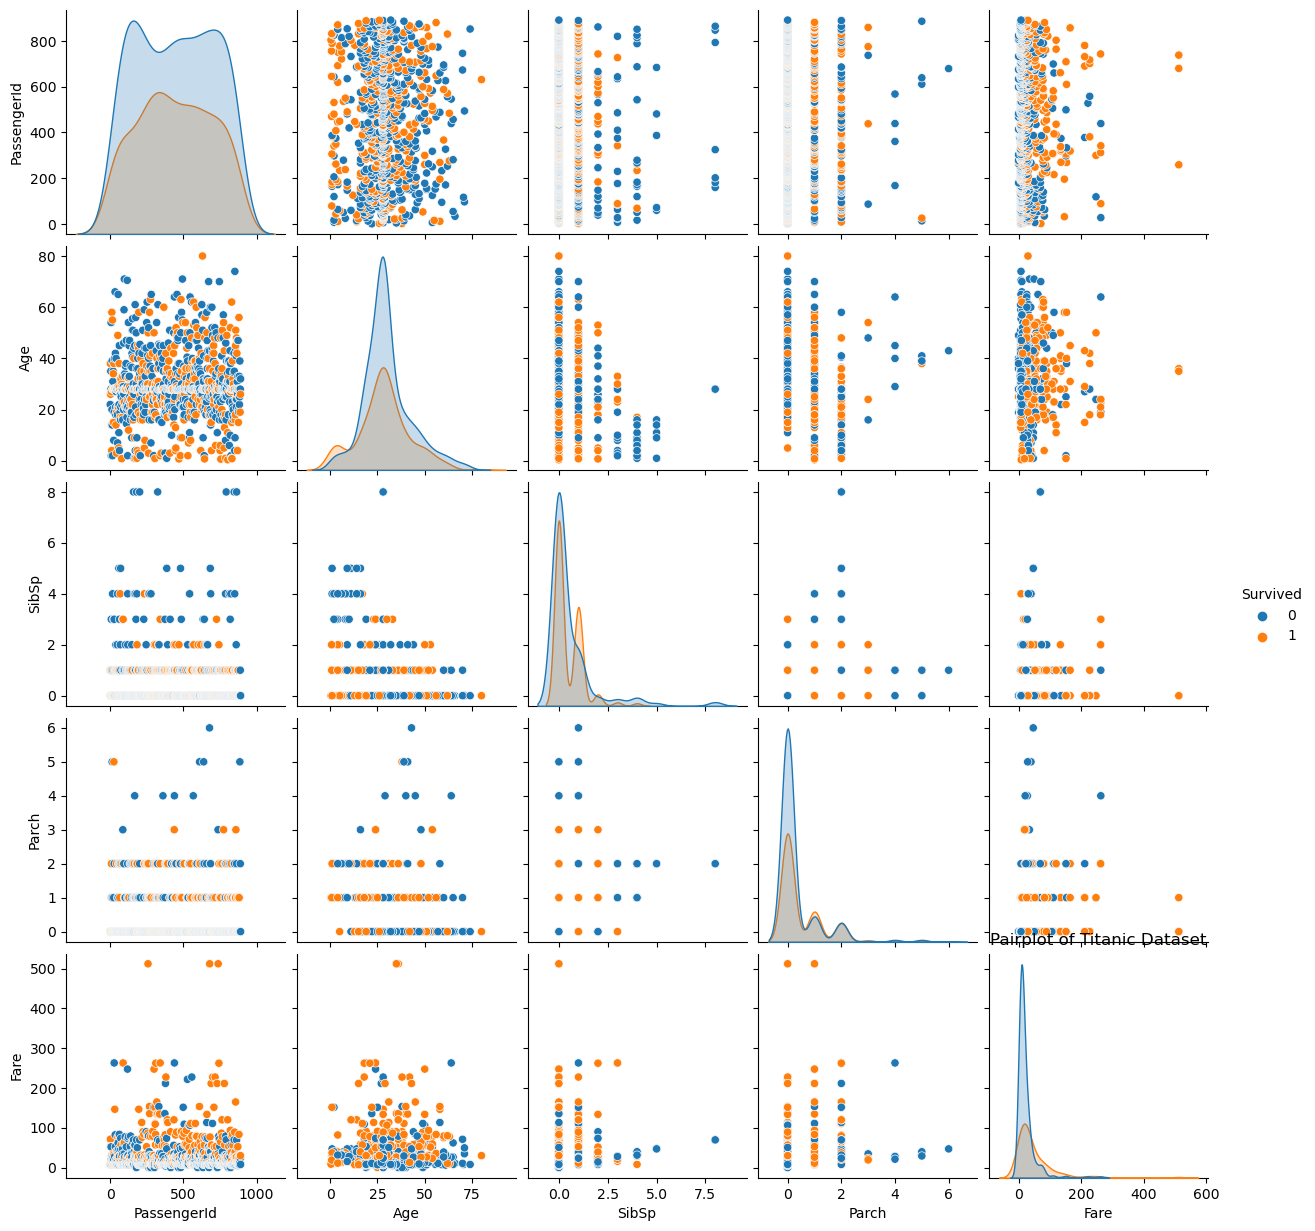

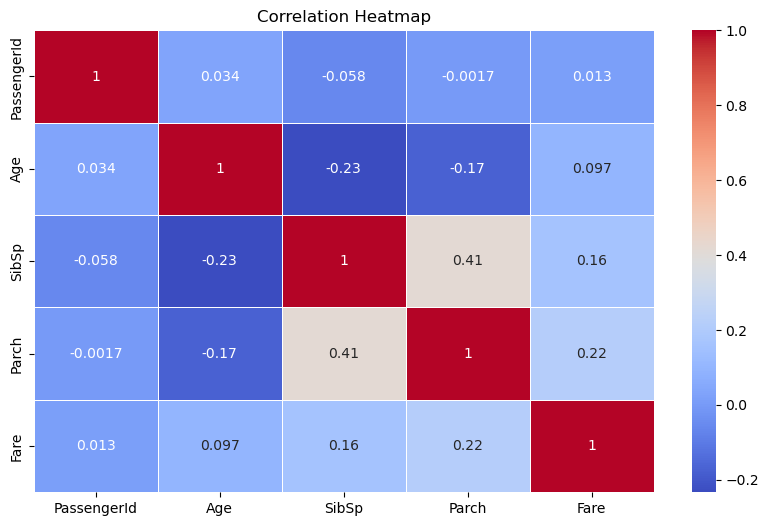

In [22]:
# Pairplot
sns.pairplot(titanic_df, hue='Survived', diag_kind='kde')
plt.title('Pairplot of Titanic Dataset')
plt.show()

# Correlation heatmap
numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [23]:
#ADDITIONAL

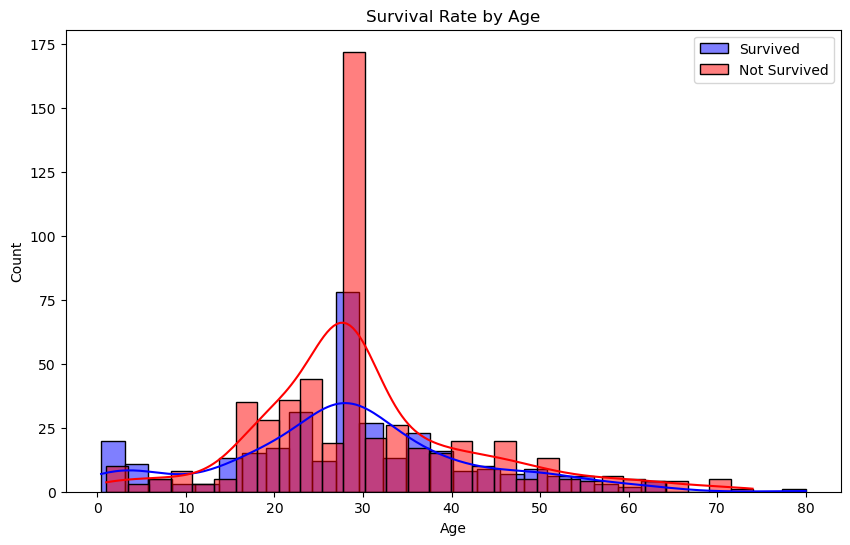

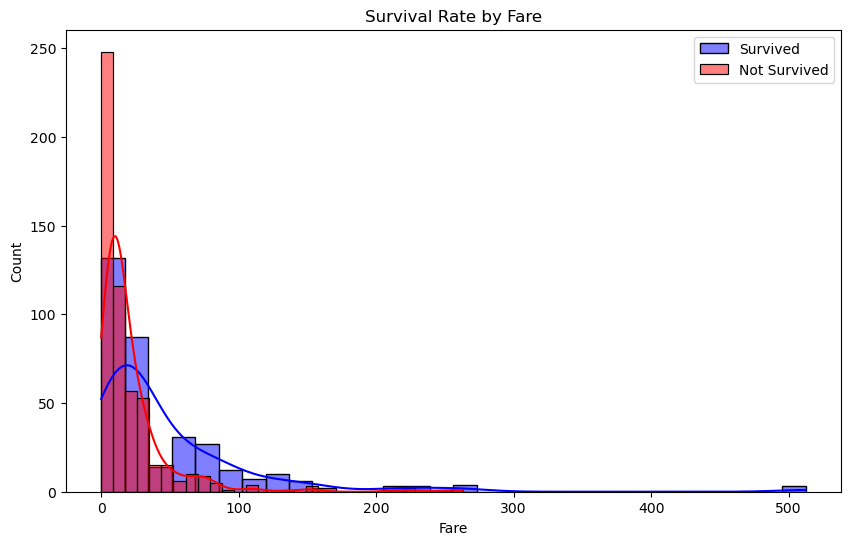

C:\Users\KRITHIGA\anaconda3\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


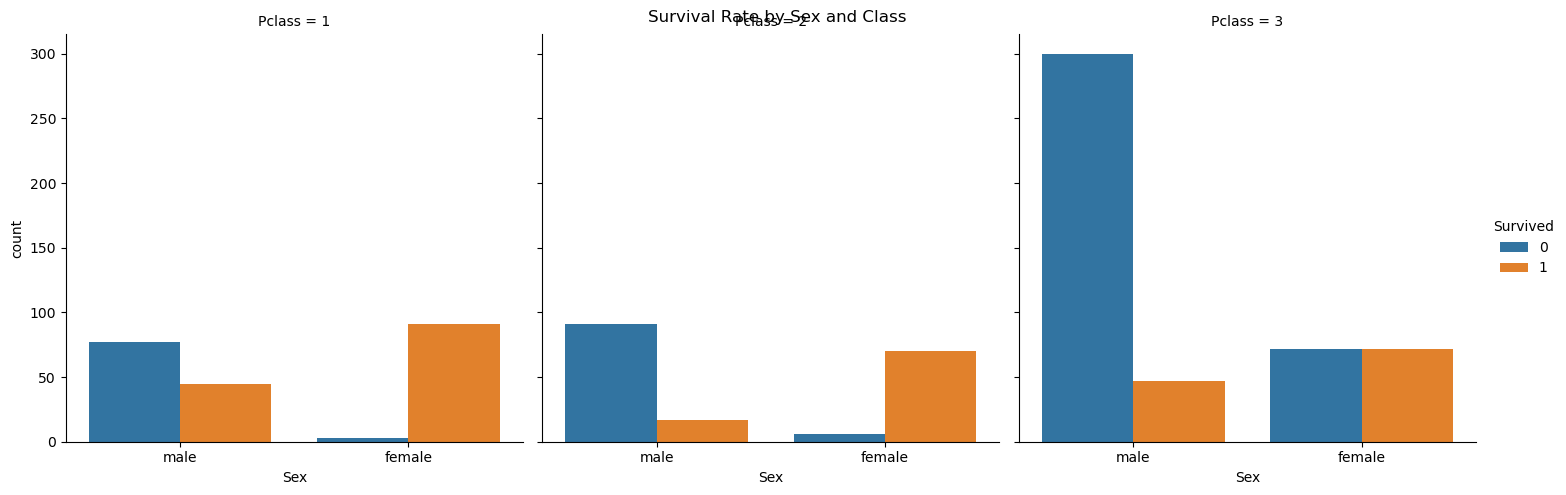

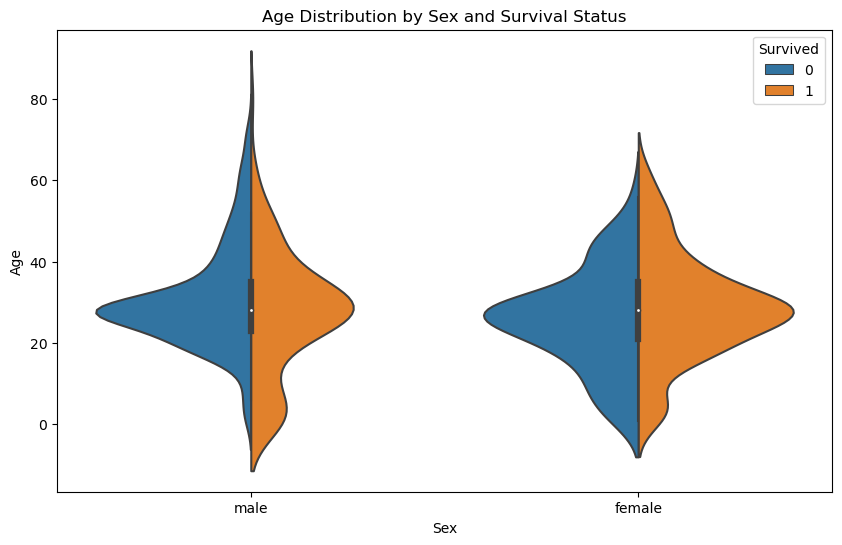

C:\Users\KRITHIGA\anaconda3\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


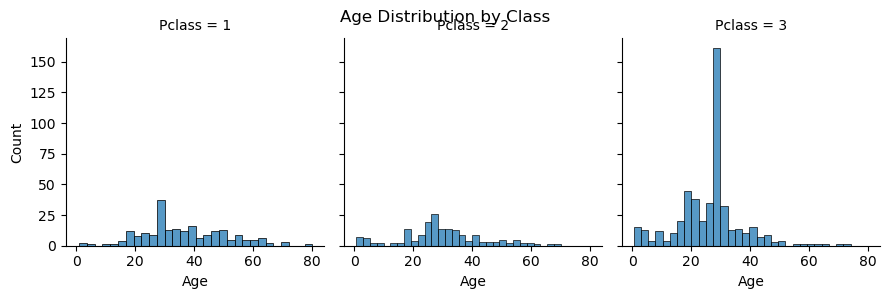

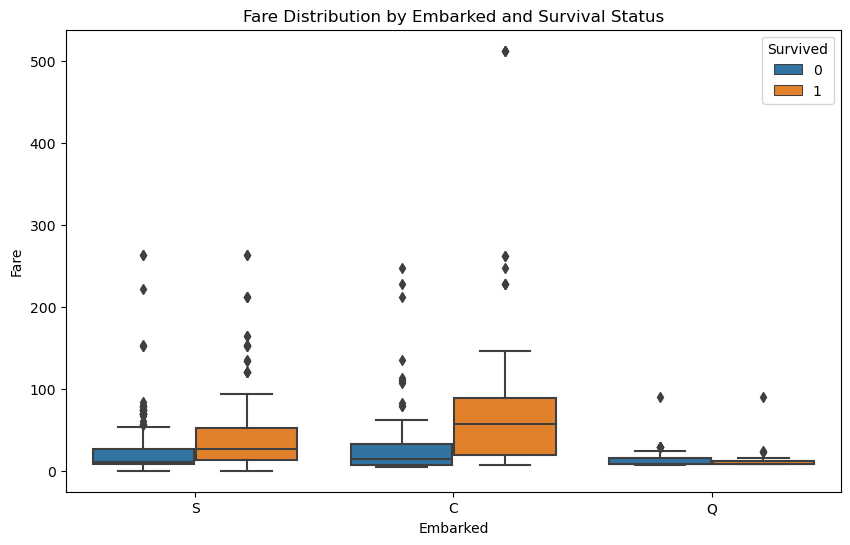

In [24]:
# Survival rate based on age
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], bins=30, kde=True, color='blue', label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

# Survival rate based on fare
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Fare'], bins=30, kde=True, color='blue', label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Fare'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Fare')
plt.legend()
plt.show()

# Survival rate based on sex and class
sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=titanic_df)
plt.suptitle('Survival Rate by Sex and Class')
plt.show()

# Violin plot of age by survival and sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True)
plt.title('Age Distribution by Sex and Survival Status')
plt.show()

# Age distribution for each class
g = sns.FacetGrid(titanic_df, col='Pclass')
g.map(sns.histplot, 'Age', bins=30)
g.fig.suptitle('Age Distribution by Class')
plt.show()

# Box plot of Fare by Embarked and Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=titanic_df)
plt.title('Fare Distribution by Embarked and Survival Status')
plt.show()
